## Instituto Tecnologico de Costa Rica
## Escuela de Computacion 
## Curso: Inteligencia Artificial
## Profesor: Luis Alexander Calvo
## Estudiantes: 
   - Josue Andrey Rojas Vega 2019042245
   - Andrew Gutierrez Castro 2019XXXXXX

### Objetivo

Implementar un programa en python usando numpy y librerias para manejo de imagenes para calcular el SVD y aplicar modificaciones en la imagen dada

Tareas a realizar:

1. Importacion de librerias necesarias

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Carga de la imagen dada y la pasamos a escala de grises para reducir los vectores de cada pixel a un solo valor

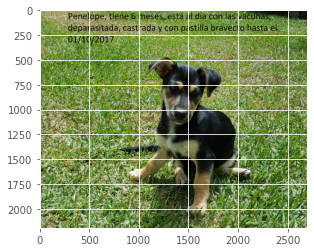

In [31]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')

plt.imshow(image)
plt.show()

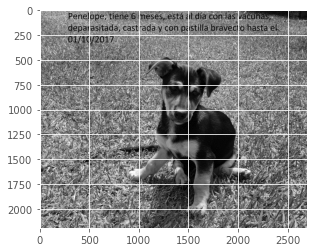

In [32]:
image = image.convert("1")

plt.imshow(image)
plt.show()

3. Carga de la matriz dada la imagen

In [33]:
A = np.asarray(image)
original_shape = A.shape
print(original_shape) # forma de la matriz resultante

(2193, 2697)


In [34]:
A[0, :10] # mostrando los primeros 10 valores de la fila 0 de la matriz de la imagen

array([ True, False,  True, False,  True, False, False, False,  True,
       False])

4. Obtener los vectores resultantes del calculo del SVD usando numpy

In [35]:
# ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
u, s, vh = np.linalg.svd(A, full_matrices=False)
u.shape, s.shape, vh.shape

((2193, 2193), (2193,), (2193, 2697))

5. Calculamos la varianza para saber que tan comprimible es la informacion

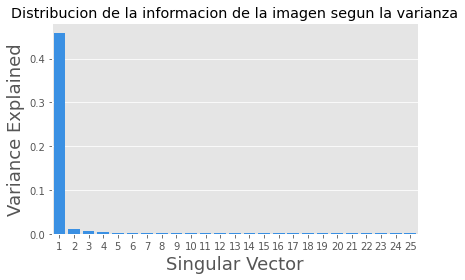

In [48]:
variance = np.round(s**2/np.sum(s**2), decimals=6)

sns.barplot(x=list(range(1, 26)),
            y=variance[0:25], color="dodgerblue")
 
plt.title('Distribucion de la informacion de la imagen segun la varianza')
plt.xlabel('Singular Vector', fontsize=18)
plt.ylabel('Variance Explained', fontsize=18)
plt.tight_layout()
plt.show()

6. Mostramos las diferentes versiones de la imagen usando las cantidades de componentes dados

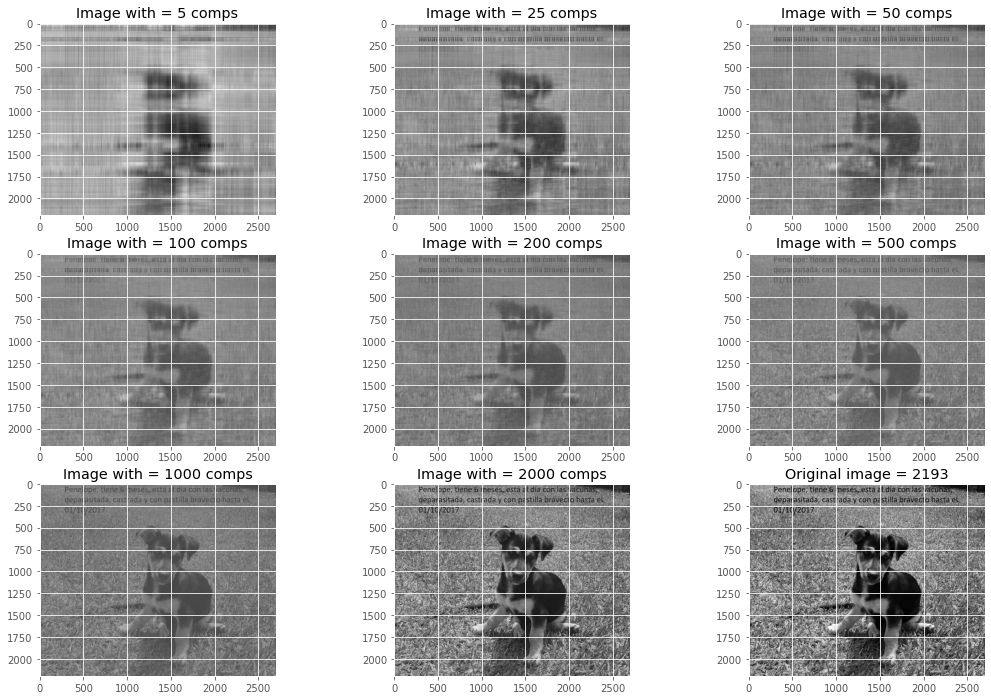

In [37]:
comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193] # [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(18, 12))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ vh[:comps[i], :]
    plt.subplot(3, 3, i+1),
    plt.imshow(low_rank, cmap='gray')
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')

7. Cargar la imagen

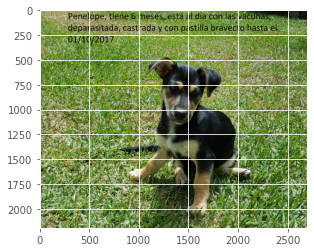

In [126]:
nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')
plt.imshow(image)
plt.show()

8. Cargar la matriz dada la imagen

In [127]:
A = np.asarray(image)
original_shape = A.shape
print(original_shape) # forma de la matriz resultante

(2193, 2697, 3)


9. Método de remodelación: Hacer un reshape de la matriz 

In [128]:
B = A.reshape(A.shape[0],A.shape[1]*A.shape[2])
'''Hacer un reshape 'botando' una dimension en otra.
   De esta
'''
print(B.shape)

(2193, 8091)


10. Método de remodelación: Obtener los vectores resultantes del calculo del SVD usando numpy

In [129]:
# ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
uB, sB, vhB = np.linalg.svd(B, full_matrices=False)
uB.shape, sB.shape, vhB.shape

((2193, 2193), (2193,), (2193, 8091))

11. Método de remodelación: Calculamos la varianza para saber que tan comprimible es la informacion

Text(0, 0.5, 'Variance Explained')

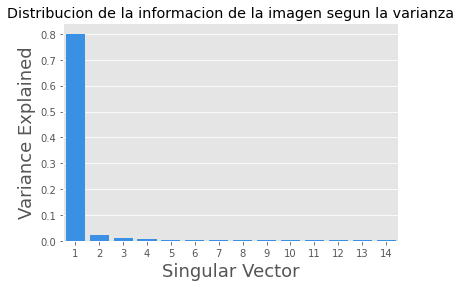

In [130]:
variance = np.round(sB**2/np.sum(sB**2), decimals=6)

sns.barplot(x=list(range(1, 15)),y=variance[0:14], color="dodgerblue")

plt.title('Distribucion de la informacion de la imagen segun la varianza')
plt.xlabel('Singular Vector', fontsize=18)
plt.ylabel('Variance Explained', fontsize=18)


6. Mostramos las diferentes versiones de la imagen usando las cantidades de componentes dados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


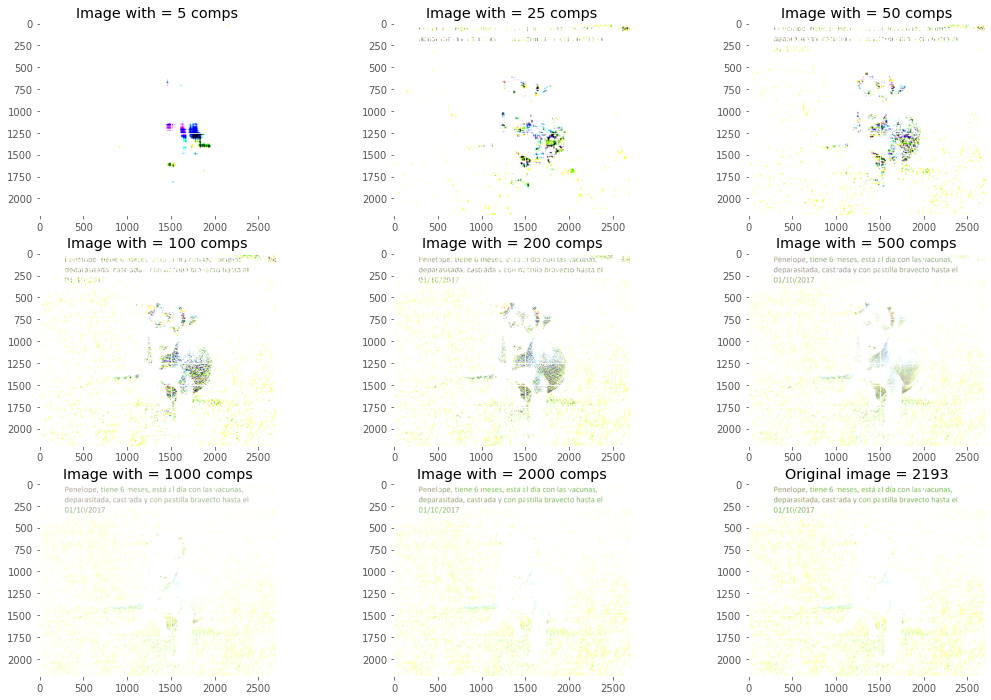

In [132]:
comps = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193] # [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(18, 12))

for i in range(len(comps)):
    low_rank = uB[:, :comps[i]] @ np.diag(sB[:comps[i]]) @ vhB[:comps[i], :]


    low_rank_1 = low_rank.reshape(low_rank.shape[0], low_rank.shape[1]//3,3)

    plt.subplot(3, 3, i+1)
    plt.imshow(low_rank_1, cmap='')
    plt.title(f'Original image = {comps[i]}' if i == len(comps)-1 else f'Image with = {comps[i]} comps')